In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.loc[df['target'] == 0, 'target'] = "setosa"
df.loc[df['target'] == 1, 'target'] = "versicolor"
df.loc[df['target'] == 2, 'target'] = "virginica"

C:\Users\G15\AppData\Local\Temp\ipykernel_23012\1301423056.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'setosa' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df['target'] == 0, 'target'] = "setosa"


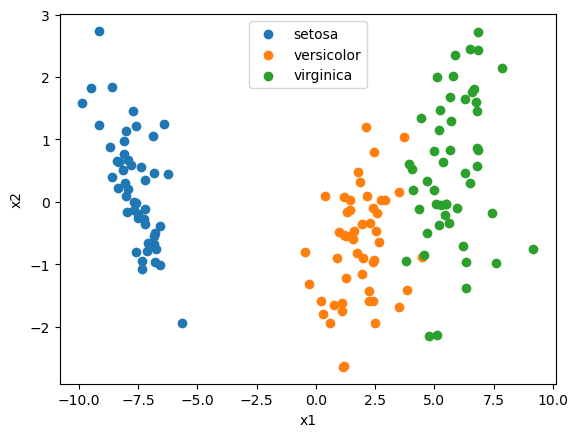

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# 特徴量とラベルに分割
# 最初の4列を特徴量 (X)、最後の列をクラスラベル (y) と仮定
X = df.iloc[:, :-1].values  # すべての列（最後以外）を特徴量として抽出
y = df.iloc[:, -1].values   # 最後の列をラベルとして抽出

# LDAを用いて次元削減 (4次元 → 2次元)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# 左右反転（LD1の符号を反転）
X_lda[:, 0] = -X_lda[:, 0]

# 結果を2次元空間で可視化
for class_id in np.unique(y):
    plt.scatter(X_lda[y == class_id, 0], X_lda[y == class_id, 1], label=class_id)
plt.xlabel('x1')  # 第1判別軸
plt.ylabel('x2')  # 第2判別軸
plt.legend()
plt.show()


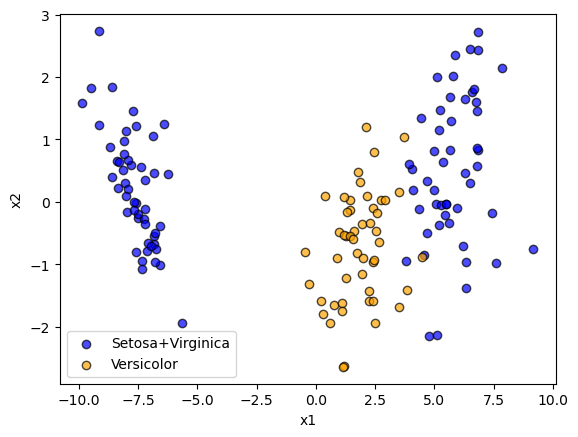

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Irisデータセットの読み込み
iris = load_iris()
X = iris.data  # 特徴量
y = iris.target  # ラベル

# クラスを統合: setosa (0) と virginica (2) をクラス0にまとめる
y_combined = np.where(y == 2, 0, y)  # virginica(2)を0に置き換え

# LDAを用いて次元削減 (4次元 → 2次元)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# 左右反転（LD1の符号を反転）
X_lda[:, 0] = -X_lda[:, 0]

# 結果を2次元空間で可視化
for class_id, class_name, color in zip([0, 1], ["Setosa+Virginica", "Versicolor"], ['blue', 'orange']):
    plt.scatter(X_lda[y_combined == class_id, 0], X_lda[y_combined == class_id, 1],
                label=class_name, alpha=0.7, edgecolors='k', color=color)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


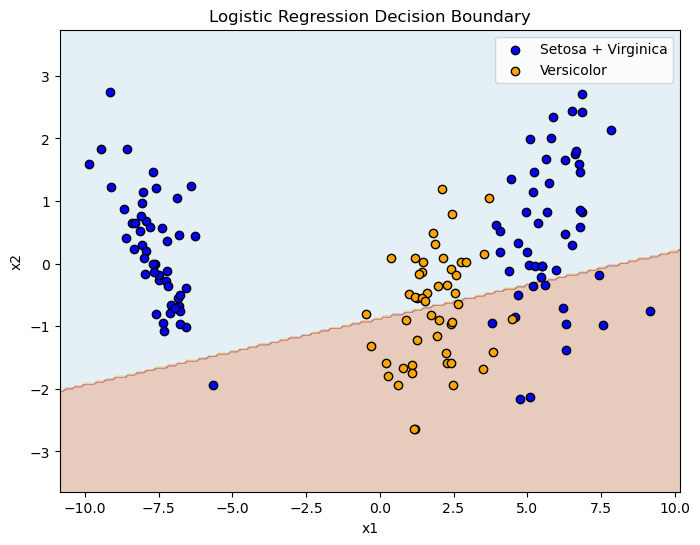

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# 1. データの準備
iris = load_iris()
X = iris.data  # 特徴量
y = iris.target  # ラベル

# setosa(0)とvirginica(2)をクラス0に統合し、versicolor(1)をクラス1とする
y_combined = np.where(y == 2, 0, y)  # virginica (2) をクラス0に統合
# print(y_combined)

# LDAを用いて次元削減 (4次元 → 2次元)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)
# print(X_lda)

# 左右反転（LD1の符号を反転）
X_lda[:, 0] = -X_lda[:, 0]

# 2. ロジスティック回帰モデルの学習
logreg = LogisticRegression()
logreg.fit(X_lda, y_combined)

# 3. 識別境界のプロット
# グリッドを作成して、各点でのクラスを予測
x_min, x_max = X_lda[:, 0].min() - 1, X_lda[:, 0].max() + 1
y_min, y_max = X_lda[:, 1].min() - 1, X_lda[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# プロット
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Paired')  # 識別境界
plt.scatter(X_lda[y_combined == 0, 0], X_lda[y_combined == 0, 1], label='Setosa + Virginica', c='blue', edgecolor='k')
plt.scatter(X_lda[y_combined == 1, 0], X_lda[y_combined == 1, 1], label='Versicolor', c='orange', edgecolor='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

setosa:
[-7.60759993  0.21513302]
[[ 0.71818979 -0.53432908]
 [-0.53432908  0.83500044]]
versicolor:
[ 1.82504949 -0.72789962]
[[1.07364854 0.24266002]
 [0.24266002 0.76295974]]


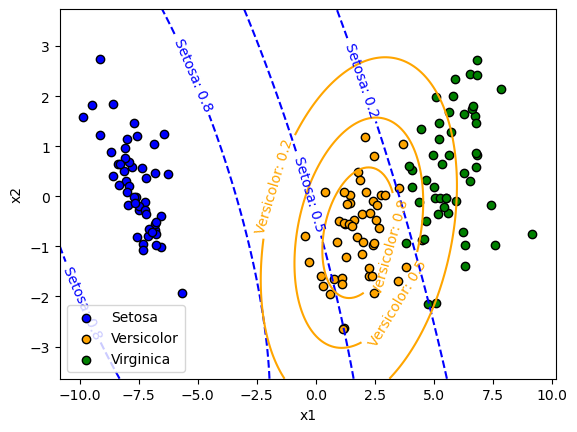

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 1. データの準備
iris = load_iris()
X = iris.data  # 特徴量
y = iris.target  # ラベル

# setosa と versicolor のデータを抽出
X_setosa = X[y == 0]  # setosa の特徴量
X_versicolor = X[y == 1]  # versicolor の特徴量


# LDAを用いて次元削減 (4次元 → 2次元)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# 左右反転（LD1の符号を反転）
X_lda[:, 0] = -X_lda[:, 0]

X_setosa_2d = X_lda[y == 0]  # setosa の2次元データ
X_versicolor_2d = X_lda[y == 1]  # versicolor の2次元データ
X_virginica_2d = X_lda[y == 2]


# 2. 各クラスの平均ベクトル (μ) と共分散行列 (Σ) を計算
mu_setosa = np.mean(X_setosa_2d, axis=0)  # setosa の平均ベクトル
sigma_setosa = np.cov(X_setosa_2d, rowvar=False)  # setosa の共分散行列
print('setosa:')
print(mu_setosa)
print(sigma_setosa)

mu_versicolor = np.mean(X_versicolor_2d, axis=0)  # versicolor の平均ベクトル
sigma_versicolor = np.cov(X_versicolor_2d, rowvar=False)  # versicolor の共分散行列
print('versicolor:')
print(mu_versicolor)
print(sigma_versicolor)

# 3. ガウス関数の定義
def gaussian_function(x, mu, sigma, alpha):
    """
    ガウス関数 f(x) を計算
    x: データ点 (ベクトル)
    mu: 平均ベクトル
    sigma: 共分散行列
    alpha: スケーリングパラメータ
    """
    diff = x - mu
    sigma_inv = np.linalg.inv(sigma)  # 共分散行列の逆行列
    exponent = -alpha * np.dot(np.dot(diff.T, sigma_inv), diff)
    return np.exp(exponent)

# 4. グリッドを作成してガウス関数値を計算
# グリッドの範囲を設定
x_min, x_max = X_lda[:, 0].min() - 1, X_lda[:, 0].max() + 1
y_min, y_max = X_lda[:, 1].min() - 1, X_lda[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# グリッド上の各点でガウス関数を計算
f_setosa_grid = np.zeros_like(xx)
f_versicolor_grid = np.zeros_like(xx)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([xx[i, j], yy[i, j]])
        f_setosa_grid[i, j] = gaussian_function(point, mu_setosa, sigma_setosa, 0.005)
        f_versicolor_grid[i, j] = gaussian_function(point, mu_versicolor, sigma_versicolor, 0.1)

# Setosa の等高線
contour_setosa = plt.contour(xx, yy, f_setosa_grid, levels=[0.2, 0.5, 0.8], colors='blue', linestyles='--', linewidths=1.5)
plt.clabel(contour_setosa, inline=True, fontsize=10, fmt='Setosa: %.1f')  # ラベルを表示

# Versicolor の等高線
contour_versicolor = plt.contour(xx, yy, f_versicolor_grid, levels=[0.2, 0.5, 0.8], colors='orange', linestyles='-', linewidths=1.5)
plt.clabel(contour_versicolor, inline=True, fontsize=10, fmt='Versicolor: %.1f')  # ラベルを表示

# データポイントをプロット
plt.scatter(X_setosa_2d[:, 0], X_setosa_2d[:, 1], c='blue', edgecolor='k', label='Setosa')
plt.scatter(X_versicolor_2d[:, 0], X_versicolor_2d[:, 1], c='orange', edgecolor='k', label='Versicolor')
plt.scatter(X_virginica_2d[:, 0], X_virginica_2d[:, 1], c='green', edgecolor='k', label='Virginica')

# グラフの装飾
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

setosa:
[-7.60759993  0.21513302]
[[ 0.71818979 -0.53432908]
 [-0.53432908  0.83500044]]
versicolor:
[ 1.82504949 -0.72789962]
[[1.07364854 0.24266002]
 [0.24266002 0.76295974]]


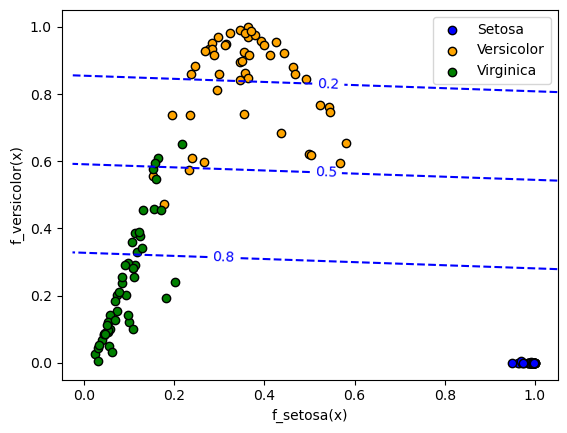

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 1. データの準備
iris = load_iris()
X = iris.data  # 特徴量
y = iris.target  # ラベル

# setosa と versicolor のデータを抽出
X_setosa = X[y == 0]  # setosa の特徴量
X_versicolor = X[y == 1]  # versicolor の特徴量

# LDAを用いて次元削減 (4次元 → 2次元)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# 左右反転（LD1の符号を反転）
X_lda[:, 0] = -X_lda[:, 0]

X_setosa_2d = X_lda[y == 0]  # setosa の2次元データ
X_versicolor_2d = X_lda[y == 1]  # versicolor の2次元データ
X_virginica_2d = X_lda[y == 2]


# 2. 各クラスの平均ベクトル (μ) と共分散行列 (Σ) を計算
mu_setosa = np.mean(X_setosa_2d, axis=0)  # setosa の平均ベクトル
sigma_setosa = np.cov(X_setosa_2d, rowvar=False)  # setosa の共分散行列
print('setosa:')
print(mu_setosa)
print(sigma_setosa)

mu_versicolor = np.mean(X_versicolor_2d, axis=0)  # versicolor の平均ベクトル
sigma_versicolor = np.cov(X_versicolor_2d, rowvar=False)  # versicolor の共分散行列
print('versicolor:')
print(mu_versicolor)
print(sigma_versicolor)

# 3. ガウス関数の定義
def gaussian_function(x, mu, sigma, alpha):
    """
    ガウス関数 f(x) を計算
    x: データ点 (ベクトル)
    mu: 平均ベクトル
    sigma: 共分散行列
    alpha: スケーリングパラメータ
    """
    diff = x - mu
    sigma_inv = np.linalg.inv(sigma)  # 共分散行列の逆行列
    exponent = -alpha * np.dot(np.dot(diff.T, sigma_inv), diff)
    return np.exp(exponent)

# 非線形特徴 (ガウス関数に基づく特徴量)
def f_setosa(x):
    return np.array([gaussian_function(xi, mu_setosa, sigma_setosa, 0.005) for xi in x])

def f_versicolor(x):
    return np.array([gaussian_function(xi, mu_versicolor, sigma_versicolor, 0.1) for xi in x])

# 非線形特徴空間の作成 (1サンプルずつ処理)
fs_setosa = f_setosa(X_setosa_2d)
fc_setosa = f_versicolor(X_setosa_2d)
fsc_setosa = np.column_stack([fs_setosa, fc_setosa])

fs_versicolor = f_setosa(X_versicolor_2d)
fc_versicolor = f_versicolor(X_versicolor_2d)
fsc_versicolor = np.column_stack([fs_versicolor, fc_versicolor])

fs_virginica = f_setosa(X_virginica_2d)
fc_virginica = f_versicolor(X_virginica_2d)
fsc_virginica = np.column_stack([fs_virginica, fc_virginica])

fsc = np.vstack([fsc_setosa, fsc_versicolor, fsc_virginica])

# setosa(0)とvirginica(2)をクラス0に統合し、versicolor(1)をクラス1とする
y_combined = np.where(y == 2, 0, y)  # virginica (2) をクラス0に統合

# 線形ロジスティック回帰モデルの学習
model = LogisticRegression()
model.fit(fsc, y_combined)

# 5. グリッドデータの作成
x_min, x_max = fsc[:, 0].min() - 0.05, fsc[:, 0].max() + 0.05
y_min, y_max = fsc[:, 1].min() - 0.05, fsc[:, 1].max() + 0.05
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# グリッド上の各点でロジスティック回帰モデルによる事後確率を計算
grid_points = np.c_[xx.ravel(), yy.ravel()]
probabilities = model.predict_proba(grid_points)

# x軸とy軸の範囲を指定
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

# Setosa, Versicolor, Virginica のデータを非線形特徴空間でプロット
plt.scatter(fs_setosa, fc_setosa, c='blue', edgecolors='k', label='Setosa')
plt.scatter(fs_versicolor, fc_versicolor, c='orange', edgecolors='k', label='Versicolor')
plt.scatter(fs_virginica, fc_virginica, c='green', edgecolors='k', label='Virginica')

# 等高線を描画 (事後確率0.2, 0.5, 0.8)
contours = plt.contour(xx, yy, probabilities[:, 0].reshape(xx.shape), levels=[0.2, 0.5, 0.8], colors='blue', linestyles='--')
plt.clabel(contours, inline=True, fontsize=10)

# グラフの装飾
plt.xlabel('f_setosa(x)')
plt.ylabel('f_versicolor(x)')
plt.legend()
plt.show()